In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from thesiscode.quality import *
from thesiscode.plotting import *
from scipy.stats import linregress

In [2]:
font = {'family' : 'normal',
        'size'   : 12,
        'weight' : 'heavy'}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams["ps.useafm"] = True
matplotlib.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams["text.usetex"] = True

In [3]:
def three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel=None, xlims=None, ylabel=None, ylims=None, txt1=None, txt2=None, txt3=None, inverted=False, outfile=None):
    colors = ["b","r","g","y","purple","orange","black"]
    
    fig = plt.figure(figsize=(6,6))
    fig.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1, wspace=0, hspace=0)

    ax = plt.subplot(221)
    for ii in range(len(x1)):
        ax.scatter(x1[ii], y1[ii], c=colors[ii], s=1, edgecolor="None")
    if txt1:
        ax.text(0.9, 0.9, txt1, transform=ax.transAxes, horizontalalignment="right")
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_ylabel(ylabel)
    if inverted:
        ax.invert_yaxis()
    ax.get_xaxis().set_ticklabels([])
    ax.minorticks_on()

    ax = plt.subplot(223)
    for ii in range(len(x2)):
        ax.scatter(x2[ii], y2[ii], c=colors[ii], s=1, edgecolor="None")
    if txt2:
        ax.text(0.9, 0.9, txt2, transform=ax.transAxes, horizontalalignment="right")
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if inverted:
        ax.invert_yaxis()
    ax.minorticks_on()

    ax = plt.subplot(224)
    for ii in range(len(x3)):
        ax.scatter(x3[ii], y3[ii], c=colors[ii], s=1, edgecolor="None")
    if txt3:
        ax.text(0.9, 0.9, txt3, transform=ax.transAxes, horizontalalignment="right")
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel(xlabel)
    ax.get_yaxis().set_ticklabels([])
    if inverted:
        ax.invert_yaxis()
    ax.minorticks_on()
    if outfile:
        plt.savefig(outfile)
    
    plt.show()

In [4]:
class wisedata(object):
    def __init__(self, df):
        df["coljk"] = df.jmag - df.kmag
        df["colj2"] = df.jmag - df.w2
        df["colk1"] = df.kmag - df.w1
        df["col12"] = df.w1 - df.w2
        df["col23"] = df.w2 - df.w3
        df["col34"] = df.w3 - df.w4
        self.original = df
        self.data = df
        self.cut = False
        self.cut_arr = []
        
    def cutme(self, cut):
        self.data = self.data[cut]
        self.cut = True
        self.cut_arr.append(True)
    

In [5]:
def plot_comparison(df1, df2, cuts=None, vmin=1E-2, cmap=plt.cm.gnuplot2, outfile=None, binsize=0.1, interpolation="nearest", figsize=(8, 4.5), w23hi=None, w23lo=None, jklim=None):
    if type(cuts) != type(None):
        df1 = df1[cuts]
    
    dx = binsize
    dy = binsize
    
    xbins = np.arange(275, 286+dx, dx)
    ybins = np.arange(-39, -27+dy, dy)
    H1, xedges, yedges = np.histogram2d(df1.glon, df1.glat, bins=(xbins, ybins))
    H2, xedges, yedges = np.histogram2d(df2.glon, df2.glat, bins=(xbins, ybins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(wspace=0.25, hspace=0.25, left=0.09, right=0.85, top=0.97, bottom=0.1)
    ax = plt.subplot2grid((2,2),(0,0),colspan=2)

    imap = ax.imshow((H1/H2).T, extent=extent, aspect="auto", interpolation=interpolation, cmap=cmap, origin="lower", vmin=vmin, vmax=1.0)
    completeness_string = "Completeness: %.2f%%" % (len(df1)/float(len(df2)) * 100)
    ax.text(0.9,0.9, completeness_string, transform=ax.transAxes, horizontalalignment="right")
        
    ax.set_xlim(275.5, 285.5)
    ax.set_xlabel("gal $l$ (deg)")
    ax.set_ylim(-40, -25)
    ax.set_ylabel("gal $b$ (deg)")
    ax.minorticks_on()

    
    ax = plt.subplot2grid((2,2),(1,0))
    xcolor1 = df1.col23
    xcolor2 = df2.col23
    ycolor1 = df1.coljk
    ycolor2 = df2.coljk
    dx = dy = 0.1
    
    xbins = np.arange(-4, 5.+dx, dx)
    ybins = np.arange(-4, 5.+dy, dy)

    H1, xedges, yedges = np.histogram2d(xcolor1, ycolor1, bins=(xbins, ybins))
    H2, xedges, yedges = np.histogram2d(xcolor2, ycolor2, bins=(xbins, ybins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    ax.imshow((H1/H2).T, extent=extent, aspect="auto", interpolation=interpolation, cmap=cmap, origin="lower", vmin=vmin, vmax=1.0)

    if jklim:
        ax.plot([-1,4],[jklim,jklim],linestyle="--",color='white', linewidth=2)
    if w23hi:
        ax.plot([w23hi,w23hi],[-2,6],linestyle="--",color='k', linewidth=2)
    if w23lo:
        print w23lo
        ax.plot([w23lo,w23lo],[-2,6],linestyle="--",color='k', linewidth=2)

    ax.set_xlim(-0.5, 3.9)
    ax.set_xlabel("W2 - W3")
    ax.set_xticks(np.arange(0, 4.+1., 1.))
    ax.set_ylabel("J - K$_s$")
    ax.set_yticks(np.arange(0, 4.+1., 1.))
    ax.set_ylim(0.5, 4.4)
    ax.minorticks_on()

    s
    ax = plt.subplot2grid((2,2),(1,1))
    xcolor1 = df1.col23
    xcolor2 = df2.col23
    ycolor1 = df1.col12
    ycolor2 = df2.col12
    dx = 0.1
    dy = 0.05
    
    xbins = np.arange(-0.5, 3.9+dx, dx)
    ybins = np.arange(-0.5, 3.9+dy, dy)
    
    H1, xedges, yedges = np.histogram2d(xcolor1, ycolor1, bins=(xbins, ybins))
    H2, xedges, yedges = np.histogram2d(xcolor2, ycolor2, bins=(xbins, ybins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    ax.imshow((H1/H2).T, extent=extent, aspect="auto", interpolation=interpolation, cmap=cmap, origin="lower", vmin=vmin, vmax=1.0)
    if w23hi:
        ax.plot([w23hi,w23hi],[-2,6],linestyle="--",color='k', linewidth=2)
    if w23lo:
        ax.plot([w23lo,w23lo],[-2,6],linestyle="--",color='k', linewidth=2)

    ax.set_xlim(-0.5, 3.9)
    ax.set_xlabel("W2-W3")
    ax.set_ylim(-0.5, 1.9)
    ax.set_ylabel("W1-W2")
    ax.minorticks_on()

    cax = fig.add_axes([0.86, 0.1, 0.04, 0.87]) 
    cbar = plt.colorbar(imap, cax = cax, ticks=np.arange(vmin, 1.0+0.1, 0.1))

    cbar.ax.set_ylabel("Completeness Fraction", fontsize=12)
    
    if outfile:
        plt.savefig(outfile)

    plt.show()

In [6]:
ogle_2mass = pd.read_csv("../samples/ogle_2mass_original.dat")
ogle_2mass = ogle_2mass[ogle_2mass.glon < 290] 

ogle_wise = pd.read_csv("../samples/ogle_2mass_allwise_alldata.dat", sep=",")
ogle_wise = ogle_wise[ogle_wise.wglon < 290] 

# wise_lmc = pd.read_csv("../contaminants/allwise_lmc_cut.dat", sep="\t")
# wise_lmc = wise_lmc[wise_lmc.glon < 290] 

In [7]:
## Make some colors
ogle_wise["coljh"] = ogle_wise.wjmag - ogle_wise.whmag
ogle_wise["coljk"] = ogle_wise.wjmag - ogle_wise.wkmag
ogle_wise["colj1"] = ogle_wise.wjmag - ogle_wise.w1
ogle_wise["colj2"] = ogle_wise.wjmag - ogle_wise.w2
ogle_wise["colj3"] = ogle_wise.wjmag - ogle_wise.w3
ogle_wise["colhk"] = ogle_wise.whmag - ogle_wise.wkmag
ogle_wise["colh1"] = ogle_wise.whmag - ogle_wise.w1
ogle_wise["colh2"] = ogle_wise.whmag - ogle_wise.w2
ogle_wise["colh3"] = ogle_wise.whmag - ogle_wise.w3
ogle_wise["colk1"] = ogle_wise.wkmag - ogle_wise.w1
ogle_wise["colk2"] = ogle_wise.wkmag - ogle_wise.w2
ogle_wise["colk3"] = ogle_wise.wkmag - ogle_wise.w3
ogle_wise["col12"] = ogle_wise.w1 - ogle_wise.w2
ogle_wise["col13"] = ogle_wise.w1 - ogle_wise.w3
ogle_wise["col23"] = ogle_wise.w2 - ogle_wise.w3

# wise_lmc["col23"] = wise_lmc.w2 - wise_lmc.w3
# wise_lmc["col12"] = wise_lmc.w1 - wise_lmc.w2
# wise_lmc["coljk"] = wise_lmc.jmag - wise_lmc.kmag
# wise_lmc["colj2"] = wise_lmc.jmag - wise_lmc.w2
# wise_lmc["colk1"] = wise_lmc.kmag - wise_lmc.w1

In [8]:
print "==== Original Set ===="
print "Original: {0}".format(len(ogle_2mass[(ogle_2mass.I > 12.5) & (ogle_2mass.kmag < 15.5) & (ogle_2mass.jmag > 1.) & (ogle_2mass.kmag > 8.5) ]))
print "Matched to WISE: {0}".format(sum((ogle_wise.I > 12.5)))
print "+ 2MASS counterparts: {0}".format(sum((ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1)))

print "\n==== Photometry Cuts ===="
print "+ I > 12.5: {0}".format(sum((ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1)))
print "+ Saturation: {0}".format(sum((ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3)))
print "+ Saturation w/ K: {0}".format(sum((ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5)))
print "+ Faint W1: {0}".format(sum((ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83)))
print "+ Faint W2: {0}".format(sum((ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83) & (ogle_wise.w2 < 15.6)))
print "+ Faint W3: {0}".format(sum((ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83) & (ogle_wise.w2 < 15.6) & (ogle_wise.w3 < 11.32)))
print "+ Faint K: {0}".format(sum((ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83) & (ogle_wise.w2 < 15.6) & (ogle_wise.w3 < 11.32) & (ogle_wise.wkmag < 15.5)))
print "+ SNR > 3: {0}".format(sum((ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83) & (ogle_wise.w2 < 15.6) & (ogle_wise.w3 < 11.32) & (ogle_wise.wkmag < 15.5) & (ogle_wise.w1snr > 3) & (ogle_wise.w2snr > 3) & (ogle_wise.w3snr > 3)))
print "+ CC [W1/2] = 0: {0}".format(sum((ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83) & (ogle_wise.w2 < 15.6) & (ogle_wise.w3 < 11.32) & (ogle_wise.wkmag < 15.5) & (ogle_wise.w1snr > 3) & (ogle_wise.w2snr > 3) & (ogle_wise.w3snr > 3) & ogle_wise.ccflag.map(lambda flag: flag.startswith("00"))))
owcut = (ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83) & (ogle_wise.w2 < 15.6) & (ogle_wise.w3 < 11.32) & (ogle_wise.wkmag < 15.5) & (ogle_wise.w1snr > 3) & (ogle_wise.w2snr > 3) & (ogle_wise.w3snr > 3) & ogle_wise.ccflag.map(lambda flag: flag.startswith("00"))

# print "\n==== Color Cuts ===="
# print "+ (J-K) > 1.1: {0}".format(sum((ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1snr > 3) & (ogle_wise.w2snr > 3) & (ogle_wise.w3snr > 3) & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83) & (ogle_wise.w2 < 15.6) & (ogle_wise.w3 < 11.32) & (ogle_wise.wkmag < 15.5) & (ogle_wise.coljk > 1.1)))
# print "+ (W2-W3) > 0.3: {0}".format(sum((ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1snr > 3) & (ogle_wise.w2snr > 3) & (ogle_wise.w3snr > 3) & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83) & (ogle_wise.w2 < 15.6) & (ogle_wise.w3 < 11.32) & (ogle_wise.wkmag < 15.5) & (ogle_wise.coljk > 1.1) & (ogle_wise.col23 > 0.3)))
# print "+ (W2-W3) < 2.5: {0}".format(sum((ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1snr > 3) & (ogle_wise.w2snr > 3) & (ogle_wise.w3snr > 3) & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83) & (ogle_wise.w2 < 15.6) & (ogle_wise.w3 < 11.32) & (ogle_wise.wkmag < 15.5) & (ogle_wise.coljk > 1.1) & (ogle_wise.col23 > 0.3) & (ogle_wise.col23 < 2.5)))

# print "\n==== Quality Cuts ===="
# print "+ SNR > 3: {0}".format(sum((ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1snr > 3) & (ogle_wise.w2snr > 3) & (ogle_wise.w3snr > 3)  & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83) & (ogle_wise.w2 < 15.6) & (ogle_wise.w3 < 11.32) & (ogle_wise.wkmag < 15.5) & (ogle_wise.coljk > 1.1) & (ogle_wise.col23 > 0.3) & (ogle_wise.col23 < 2.5)))
# owcut = ogle_wise[(ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1snr > 3) & (ogle_wise.w2snr > 3) & (ogle_wise.w3snr > 3)  & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83) & (ogle_wise.w2 < 15.6) & (ogle_wise.w3 < 11.32) & (ogle_wise.wkmag < 15.5) & (ogle_wise.coljk > 1.1) & (ogle_wise.col23 > 0.3) & (ogle_wise.col23 < 2.5) & ((ogle_wise.ccflag == "000h") | (ogle_wise.ccflag == "000H") | (ogle_wise.ccflag == "000d") | (ogle_wise.ccflag == "000D") | (ogle_wise.ccflag == "000p") | (ogle_wise.ccflag == "000P") | (ogle_wise.ccflag == "000o") | (ogle_wise.ccflag == "000O") | (ogle_wise.ccflag == "0000"))]
# owcolor = ogle_wise[(ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1snr > 3) & (ogle_wise.w2snr > 3) & (ogle_wise.w3snr > 3)  & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83) & (ogle_wise.w2 < 15.6) & (ogle_wise.w3 < 11.32) & (ogle_wise.wkmag < 15.5) & (ogle_wise.coljk > 1.1) & (ogle_wise.col23 > 0.3) & (ogle_wise.col23 < 2.5)]
# print "+ CC [W1/W2/W3] = 0: {0}".format(len(owcut))

print "\n==== Retention ===="
print "W.R.T Original: {0}%".format(sum(owcut)/float(sum((ogle_2mass.I > 12.5) & (ogle_2mass.kmag < 15.5) & (ogle_2mass.jmag > 1.) & (ogle_2mass.kmag > 8.5) ))*100)
print "W.R.T WISE+2MASS: {0}%".format(sum(owcut)/float(sum((ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1)))*100)


==== Original Set ====
Original: 46385
Matched to WISE: 43975
+ 2MASS counterparts: 43209

==== Photometry Cuts ====
+ I > 12.5: 43209
+ Saturation: 43209
+ Saturation w/ K: 43201
+ Faint W1: 43201
+ Faint W2: 43200
+ Faint W3: 19358
+ Faint K: 19358
+ SNR > 3: 18995
+ CC [W1/2] = 0: 9239

==== Retention ====
W.R.T Original: 19.9180769645%
W.R.T WISE+2MASS: 21.3821194659%


####Quality Cuts:
- faint limits: [w1/w2/w3/k] = [16.83/15.6/11.32/15.5]
- saturation limits: [2/1.5/-3/8.5]
- snr > 3
- ccflag == 00**

####Define locus:
- -0.02<  K - W1 < 0.25
- J-K < 1.1

In [9]:
# qual1 = (ogle_2mass.I > 12.5) & (ogle_2mass.kmag < 15.5) & (ogle_2mass.jmag > 1.) & (ogle_2mass.kmag > 8.5) 
# qual2 = (ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83) & (ogle_wise.w2 < 15.6) & (ogle_wise.w3 < 11.32) & (ogle_wise.wkmag < 15.5)
# # qual3 = (wise_lmc.w1 < 16.83) & (wise_lmc.w2 < 15.6) & (wise_lmc.w3 < 11.32) & (wise_lmc.kmag < 15.5) & (wise_lmc.w1 > 2.) & (wise_lmc.w2 > 1.5) & (wise_lmc.w3 > -3) & (wise_lmc.jmag > 1) &(wise_lmc.kmag > 8.5) & (wise_lmc.w1snr > 3) & (wise_lmc.w2snr > 3) & (wise_lmc.w3snr > 3) & (wise_lmc.n2mass == 1)

In [10]:
# ## Quality cuts
# ogle_2mass = ogle_2mass[qual1]
# ogle_wise_cut = ogle_wise[qual2]
# # wise_lmc = wise_lmc[qual3]


In [11]:
# cc2 = ogle_wise_cut.ccflag.str.extract("([000.])").replace("0", True).fillna(False)
# cc3 = wise_lmc.ccflag.str.extract("([000.])").replace("0", True).fillna(False)

In [12]:
## Confusion and Contamination Flags
# ogle_wise = ogle_wise[cc2]
# wise_lmc = wise_lmc[cc3]

In [13]:
# binsize=0.2
# dx = binsize
# dy = binsize

# xbins = np.arange(275, 286+dx, dx)
# ybins = np.arange(-39, -27+dy, dy)
# H1, xedges, yedges = np.histogram2d(owcolor.glon, owcolor.glat, bins=(xbins, ybins))
# H2, xedges, yedges = np.histogram2d(owphoto.glon, owphoto.glat, bins=(xbins, ybins))
# H2 = np.array(H2, dtype=float)
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# fig = plt.figure(figsize=(8,4))
# ax = plt.subplot(111)
# imap = ax.imshow((H1/H2).T, extent=extent, aspect="auto", interpolation="bicubic", cmap=plt.cm.gnuplot, origin="lower", vmin=1E-2, vmax=1.0)
# completeness_string = "Completeness: %.2f%%" % (len(owcolor)/float(len(owphoto)) * 100)
# ax.text(0.9,0.9, completeness_string, transform=ax.transAxes, horizontalalignment="right")

# ax.set_xlim(275.5, 285.5)
# ax.set_xlabel("gal $l$ (deg)")
# ax.set_ylim(-40, -25)
# ax.set_ylabel("gal $b$ (deg)")
# ax.minorticks_on()

# cax = fig.add_axes([0.86, 0.1, 0.04, 0.875]) 
# cbar = plt.colorbar(imap, cax = cax, ticks=np.arange(1E-2, 1.0+0.1, 0.1))

# cbar.ax.set_ylabel("Completeness Fraction", fontsize=12)
# plt.show()

In [14]:
# plot_comparison(owcolor, owphoto, binsize=0.2, cmap=plt.cm.gnuplot, figsize=(8,8), vmin=0, outfile="../figures/ogle_completeness_map.png")
# plot_comparison(owcolor[owcolor.col12 > 0.2], owphoto, binsize=0.2, cmap=plt.cm.gnuplot, figsize=(8,8), vmin=0, outfile="../figures/ogle_completeness_map_w12.png")


In [15]:
# DM_lmc = 18.32
# owcolor["Mw1"] = owcolor.w1 - DM_lmc

In [16]:
# orich = (owcolor.Spectr == "O-rich") & (owcolor.col12 > 0.2)
# crich = (owcolor.Spectr == "C-rich") & (owcolor.col12 > 0.2)
# xbins = np.arange(0.2, 1.6+0.2, 0.2)
# medians = []
# stdevs = []
# for ii in range(len(xbins)-1):
#     thecut = (owcolor.col12 > xbins[ii]) & (owcolor.col12 < xbins[ii+1])
#     medians.append(np.median(owcolor.Mw1[thecut]))
#     stdevs.append(np.std(owcolor.Mw1[thecut]))
    
# medians = np.array(medians)
# stdevs = np.array(stdevs)
    
# linepars = linregress(owcolor.col12, owcolor.Mw1)
# m = linepars[0]
# b = linepars[1]

# fig = plt.figure(figsize=(6,6))
# fig.subplots_adjust(wspace=0.25, hspace=0, left=0.1, right=0.97, top=0.97, bottom=0.1)
# ax = plt.subplot2grid((3,1),(0,0), rowspan=2)
# ax.scatter(owcolor.col12[crich], owcolor.Mw1[crich], s=5, edgecolor="None", c="r")
# ax.scatter(owcolor.col12[orich], owcolor.Mw1[orich], s=5, edgecolor="None", c="b")
# ax.errorbar(xbins[:-1]+0.1, medians, yerr=stdevs, ecolor='k', elinewidth=2, linewidth=2, color="k", marker="o", markersize=7)
# ax.plot(xbins[:-1]+0.1, m*(xbins[:-1]+0.1) + b, color="k", linestyle="--", linewidth=2)
# ax.set_xlim(0.11, 1.79)
# ax.set_ylabel("M$_{W1}$")
# ax.set_ylim(-11, -5.5)
# ax.invert_yaxis()
# ax.minorticks_on()

# ax = plt.subplot2grid((3,1),(2,0))
# H, edges = np.histogram(owcolor.col12, bins=xbins)
# ax.bar(edges[:-1], H, width=0.2)
# # ax.hist(owcolor.col12, bins=xbins)
# ax.set_xlabel("W1-W2")
# ax.set_xlim(0.11, 1.79)
# ax.set_ylabel("N")
# ax.set_ylim(0, 590)
# ax.minorticks_on()

# plt.savefig("../figures/ogle_lmc_colormag.png")
# plt.show()

## And now contaminants

In [9]:
vagc = pd.read_csv("../contaminants/vagc_allwise_allmags.dat", sep="\t")
vagc["coljh"] = vagc.jmag - vagc.hmag
vagc["coljk"] = vagc.jmag - vagc.kmag
vagc["colj1"] = vagc.jmag - vagc.w1
vagc["colj2"] = vagc.jmag - vagc.w2
vagc["colj3"] = vagc.jmag - vagc.w3
vagc["colhk"] = vagc.hmag - vagc.kmag
vagc["colh1"] = vagc.hmag - vagc.w1
vagc["colh2"] = vagc.hmag - vagc.w2
vagc["colh3"] = vagc.hmag - vagc.w3
vagc["colk1"] = vagc.kmag - vagc.w1
vagc["colk2"] = vagc.kmag - vagc.w2
vagc["colk3"] = vagc.kmag - vagc.w3
vagc["col12"] = vagc.w1 - vagc.w2
vagc["col13"] = vagc.w1 - vagc.w3
vagc["col23"] = vagc.w2 - vagc.w3
# vagc = vagc[(vagc.n2mass == 1) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.r_MODELMAG < 21)]# & (vagc.coljk > 1.1) & (vagc.col23 > 0.3) & (vagc.col23 < 2.5)]# & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.kmag < 12.05)]# & (vagc.coljk > 1.1) & (vagc.col23 > 0.3) & (vagc.col23 < 2.5)]

lrgs = pd.read_csv("../contaminants/lrg_allwise_allmags.dat", sep="\t")
lrgs["coljh"] = lrgs.jmag - lrgs.hmag
lrgs["coljk"] = lrgs.jmag - lrgs.kmag
lrgs["colj1"] = lrgs.jmag - lrgs.w1
lrgs["colj2"] = lrgs.jmag - lrgs.w2
lrgs["colj3"] = lrgs.jmag - lrgs.w3
lrgs["colhk"] = lrgs.hmag - lrgs.kmag
lrgs["colh1"] = lrgs.hmag - lrgs.w1
lrgs["colh2"] = lrgs.hmag - lrgs.w2
lrgs["colh3"] = lrgs.hmag - lrgs.w3
lrgs["colk1"] = lrgs.kmag - lrgs.w1
lrgs["colk2"] = lrgs.kmag - lrgs.w2
lrgs["colk3"] = lrgs.kmag - lrgs.w3
lrgs["col12"] = lrgs.w1 - lrgs.w2
lrgs["col13"] = lrgs.w1 - lrgs.w3
lrgs["col23"] = lrgs.w2 - lrgs.w3
# lrgs = lrgs[(lrgs.n2mass == 1) & (lrgs.w1 < 16.83) & (lrgs.w2 < 15.6) & (lrgs.w3 < 11.32)]

In [10]:
print "======== Original Set ========"
print "Starting: 441,707"
print "-- QSO: 122,550"
print "-- AGN: 19,184"
print "-- SF: 232,845"
print "-- SB: 67,128"

print "\nMatched to WISE-2MASS: 56,898"
print "-- QSO: {0}".format(sum((vagc.n2mass==1) & (vagc.CLASS == "QSO")))
print "-- AGN: {0}".format(sum((vagc.n2mass==1) & ((vagc.SUBCLASS == "AGN") | (vagc.SUBCLASS == "AGN BROADLINE"))))
print "-- SF: {0}".format(sum((vagc.n2mass==1) & ((vagc.SUBCLASS == "STARFORMING") | (vagc.SUBCLASS == "STARFORMING BROADLINE"))))
print "-- SB: {0}".format(sum((vagc.n2mass==1) & ((vagc.SUBCLASS == "STARBURST") | (vagc.SUBCLASS == "STARBURST BROADLINE"))))

print "\n======== Photometry Cuts ========"
print "+ Saturation: 56,896"
print "-- QSO: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.CLASS == "QSO")))
print "-- AGN: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & ((vagc.SUBCLASS == "AGN") | (vagc.SUBCLASS == "AGN BROADLINE"))))
print "-- SF: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & ((vagc.SUBCLASS == "STARFORMING") | (vagc.SUBCLASS == "STARFORMING BROADLINE"))))
print "-- SB: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & ((vagc.SUBCLASS == "STARBURST") | (vagc.SUBCLASS == "STARBURST BROADLINE"))))

print "\n+ Saturation w/ K: 56,894"
print "-- QSO: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.CLASS == "QSO")))
print "-- AGN: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & ((vagc.SUBCLASS == "AGN") | (vagc.SUBCLASS == "AGN BROADLINE"))))
print "-- SF: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & ((vagc.SUBCLASS == "STARFORMING") | (vagc.SUBCLASS == "STARFORMING BROADLINE"))))
print "-- SB: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & ((vagc.SUBCLASS == "STARBURST") | (vagc.SUBCLASS == "STARBURST BROADLINE"))))

print "\n+ Faint W1: 56,894"
print "-- QSO: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.CLASS == "QSO")))
print "-- AGN: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & ((vagc.SUBCLASS == "AGN") | (vagc.SUBCLASS == "AGN BROADLINE"))))
print "-- SF: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & ((vagc.SUBCLASS == "STARFORMING") | (vagc.SUBCLASS == "STARFORMING BROADLINE"))))
print "-- SB: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & ((vagc.SUBCLASS == "STARBURST") | (vagc.SUBCLASS == "STARBURST BROADLINE"))))

print "\n+ Faint W2: 56,884"
print "-- QSO: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.CLASS == "QSO")))
print "-- AGN: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & ((vagc.SUBCLASS == "AGN") | (vagc.SUBCLASS == "AGN BROADLINE"))))
print "-- SF: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & ((vagc.SUBCLASS == "STARFORMING") | (vagc.SUBCLASS == "STARFORMING BROADLINE"))))
print "-- SB: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & ((vagc.SUBCLASS == "STARBURST") | (vagc.SUBCLASS == "STARBURST BROADLINE"))))

print "\n+ Faint W3: 55,516"
print "-- QSO: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.CLASS == "QSO")))
print "-- AGN: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & ((vagc.SUBCLASS == "AGN") | (vagc.SUBCLASS == "AGN BROADLINE"))))
print "-- SF: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & ((vagc.SUBCLASS == "STARFORMING") | (vagc.SUBCLASS == "STARFORMING BROADLINE"))))
print "-- SB: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & ((vagc.SUBCLASS == "STARBURST") | (vagc.SUBCLASS == "STARBURST BROADLINE"))))

print "\n+ Faint K: 52,136"
print "-- QSO: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.CLASS == "QSO")))
print "-- AGN: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & ((vagc.SUBCLASS == "AGN") | (vagc.SUBCLASS == "AGN BROADLINE"))))
print "-- SF: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & ((vagc.SUBCLASS == "STARFORMING") | (vagc.SUBCLASS == "STARFORMING BROADLINE"))))
print "-- SB: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & ((vagc.SUBCLASS == "STARBURST") | (vagc.SUBCLASS == "STARBURST BROADLINE"))))

print "\n+ SNR > 3: 52,113"
print "-- QSO: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & (vagc.CLASS == "QSO")))
print "-- AGN: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & ((vagc.SUBCLASS == "AGN") | (vagc.SUBCLASS == "AGN BROADLINE"))))
print "-- SF: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & ((vagc.SUBCLASS == "STARFORMING") | (vagc.SUBCLASS == "STARFORMING BROADLINE"))))
print "-- SB: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & ((vagc.SUBCLASS == "STARBURST") | (vagc.SUBCLASS == "STARBURST BROADLINE"))))

print "\n+ [W1/2] ccflag = 0:"
print "-- QSO: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & (vagc.ccflag.map(lambda flag: flag.startswith("00"))) & (vagc.CLASS == "QSO")))
print "-- AGN: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & (vagc.ccflag.map(lambda flag: flag.startswith("00"))) & ((vagc.SUBCLASS == "AGN") | (vagc.SUBCLASS == "AGN BROADLINE"))))
print "-- SF: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & (vagc.ccflag.map(lambda flag: flag.startswith("00"))) & ((vagc.SUBCLASS == "STARFORMING") | (vagc.SUBCLASS == "STARFORMING BROADLINE"))))
print "-- SB: {0}".format(sum((vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & (vagc.ccflag.map(lambda flag: flag.startswith("00"))) & ((vagc.SUBCLASS == "STARBURST") | (vagc.SUBCLASS == "STARBURST BROADLINE"))))

vcut1 = (vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & (vagc.ccflag.map(lambda flag: flag.startswith("00"))) & (vagc.CLASS == "QSO")
vcut2 = (vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & (vagc.ccflag.map(lambda flag: flag.startswith("00"))) & ((vagc.SUBCLASS == "AGN") | (vagc.SUBCLASS == "AGN BROADLINE"))
vcut3 = (vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & (vagc.ccflag.map(lambda flag: flag.startswith("00"))) & ((vagc.SUBCLASS == "STARFORMING") | (vagc.SUBCLASS == "STARFORMING BROADLINE"))
vcut4 = (vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & (vagc.ccflag.map(lambda flag: flag.startswith("00"))) & ((vagc.SUBCLASS == "STARBURST") | (vagc.SUBCLASS == "STARBURST BROADLINE"))

# vcut1 = vagc[(vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & (vagc.CLASS == "QSO")]
# vcut2 = vagc[(vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & ((vagc.SUBCLASS == "AGN") | (vagc.SUBCLASS == "AGN BROADLINE"))]
# vcut3 = vagc[(vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & ((vagc.SUBCLASS == "STARFORMING") | (vagc.SUBCLASS == "STARFORMING BROADLINE"))]
# vcut4 = vagc[(vagc.n2mass == 1) & (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3) & (vagc.kmag > 8.5) & (vagc.w1 < 16.83) & (vagc.w2 < 15.6) & (vagc.w3 < 11.32) & (vagc.kmag < 15.5) & (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3) & ((vagc.SUBCLASS == "STARBURST") | (vagc.SUBCLASS == "STARBURST BROADLINE"))]

# vcut1 = vcut1.ccflag.str.extract("([000.])").replace("0", True).fillna(False)
# vcut2 = vcut2.ccflag.str.extract("([000.])").replace("0", True).fillna(False)
# vcut3 = vcut3.ccflag.str.extract("([000.])").replace("0", True).fillna(False)
# vcut4 = vcut4.ccflag.str.extract("([000.])").replace("0", True).fillna(False)
# print "\n+ CC [W1/W2/W3] > 3: 52,113"
# print "-- QSO: {0}".format(len(vcut1))
# print "-- AGN: {0}".format(len(vcut2))
# print "-- SF: {0}".format(len(vcut3))
# print "-- SB: {0}".format(len(vcut4))


======== Original Set ========
Starting: 441,707
-- QSO: 122,550
-- AGN: 19,184
-- SF: 232,845
-- SB: 67,128

Matched to WISE-2MASS: 56,898
-- QSO: 6902
-- AGN: 3098
-- SF: 36539
-- SB: 10359

======== Photometry Cuts ========
+ Saturation: 56,896
-- QSO: 6901
-- AGN: 3098
-- SF: 36539
-- SB: 10358

+ Saturation w/ K: 56,894
-- QSO: 6900
-- AGN: 3098
-- SF: 36538
-- SB: 10358

+ Faint W1: 56,894
-- QSO: 6900
-- AGN: 3098
-- SF: 36538
-- SB: 10358

+ Faint W2: 56,884
-- QSO: 6891
-- AGN: 3098
-- SF: 36537
-- SB: 10358

+ Faint W3: 55,516
-- QSO: 6728
-- AGN: 3005
-- SF: 35678
-- SB: 10105

+ Faint K: 52,136
-- QSO: 5283
-- AGN: 2878
-- SF: 34299
-- SB: 9676

+ SNR > 3: 52,113
-- QSO: 5279
-- AGN: 2876
-- SF: 34285
-- SB: 9673

+ [W1/2] ccflag = 0:
-- QSO: 5029
-- AGN: 2741
-- SF: 32805
-- SB: 9219


In [11]:
print "======== Original Set ========"
print "Starting: 105,631"
print "Matched to WISE-2MASS: {0}".format(sum(lrgs.n2mass == 1))

print "\n======== Photometry Cuts ========"
print "+ Saturation: {0}".format(sum((lrgs.n2mass == 1) & (lrgs.w1 > 2.) & (lrgs.w2 > 1.5) & (lrgs.w3 > -3)))
print "+ Saturation w/ K: {0}".format(sum((lrgs.n2mass == 1) & (lrgs.w1 > 2.) & (lrgs.w2 > 1.5) & (lrgs.w3 > -3) & (lrgs.kmag > 8.5)))
print "+ Faint W1: {0}".format(sum((lrgs.n2mass == 1) & (lrgs.w1 > 2.) & (lrgs.w2 > 1.5) & (lrgs.w3 > -3) & (lrgs.kmag > 8.5) & (lrgs.w1 < 16.83)))
print "+ Faint W2: {0}".format(sum((lrgs.n2mass == 1) & (lrgs.w1 > 2.) & (lrgs.w2 > 1.5) & (lrgs.w3 > -3) & (lrgs.kmag > 8.5) & (lrgs.w1 < 16.83) & (lrgs.w2 < 15.6)))
print "+ Faint W3: {0}".format(sum((lrgs.n2mass == 1) & (lrgs.w1 > 2.) & (lrgs.w2 > 1.5) & (lrgs.w3 > -3) & (lrgs.kmag > 8.5) & (lrgs.w1 < 16.83) & (lrgs.w2 < 15.6) & (lrgs.w3 < 11.32)))
print "+ Faint K: {0}".format(sum((lrgs.n2mass == 1) & (lrgs.w1 > 2.) & (lrgs.w2 > 1.5) & (lrgs.w3 > -3) & (lrgs.kmag > 8.5) & (lrgs.w1 < 16.83) & (lrgs.w2 < 15.6) & (lrgs.w3 < 11.32) & (lrgs.kmag < 15.5)))
print "+ SNR > 3: {0}".format(sum((lrgs.n2mass == 1) & (lrgs.w1 > 2.) & (lrgs.w2 > 1.5) & (lrgs.w3 > -3) & (lrgs.kmag > 8.5) & (lrgs.w1 < 16.83) & (lrgs.w2 < 15.6) & (lrgs.w3 < 11.32) & (lrgs.kmag < 15.5) & (lrgs.w1snr > 3) & (lrgs.w2snr > 3) & (lrgs.w3snr > 3)))
print "+ [W1/2] CCflag: {0}".format(sum((lrgs.n2mass == 1) & (lrgs.w1 > 2.) & (lrgs.w2 > 1.5) & (lrgs.w3 > -3) & (lrgs.kmag > 8.5) & (lrgs.w1 < 16.83) & (lrgs.w2 < 15.6) & (lrgs.w3 < 11.32) & (lrgs.kmag < 15.5) & (lrgs.w1snr > 3) & (lrgs.w2snr > 3) & (lrgs.w3snr > 3) & (lrgs.ccflag.map(lambda flag: flag.startswith("00")))))

lrgscut = (lrgs.n2mass == 1) & (lrgs.w1 > 2.) & (lrgs.w2 > 1.5) & (lrgs.w3 > -3) & (lrgs.kmag > 8.5) & (lrgs.w1 < 16.83) & (lrgs.w2 < 15.6) & (lrgs.w3 < 11.32) & (lrgs.kmag < 15.5) & (lrgs.w1snr > 3) & (lrgs.w2snr > 3) & (lrgs.w3snr > 3) & (lrgs.ccflag.map(lambda flag: flag.startswith("00"))) 
# lrgscut = lrgscut.ccflag.str.extract("([000.])").replace("0", True).fillna(False)
# print "+ CC [W1/W2/W3] > 3: {0}".format(len(lrgscut))


======== Original Set ========
Starting: 105,631
Matched to WISE-2MASS: 75543

======== Photometry Cuts ========
+ Saturation: 75527
+ Saturation w/ K: 75527
+ Faint W1: 75527
+ Faint W2: 75527
+ Faint W3: 1184
+ Faint K: 1167
+ SNR > 3: 1079
+ [W1/2] CCflag: 1038


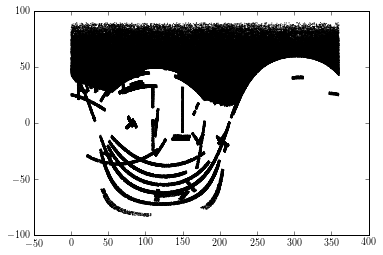

In [12]:
## VAGC from DR7 Covering 10,417 square degrees
plt.scatter(vagc.glon, vagc.glat, s=1, edgecolor="None", c='k')
plt.show()

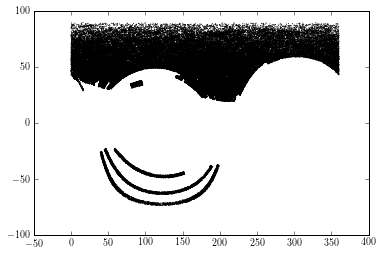

In [13]:
## LRG survey from DR7 covering 10,417 square degrees
plt.scatter(lrgs.glon, lrgs.glat, s=1, edgecolor="None", c='k')
plt.show()

In [14]:
qso = vagc[vcut1]
agn = vagc[vcut2]
sf = vagc[vcut3]
sb = vagc[vcut4]
lrgs = lrgs[lrgscut]

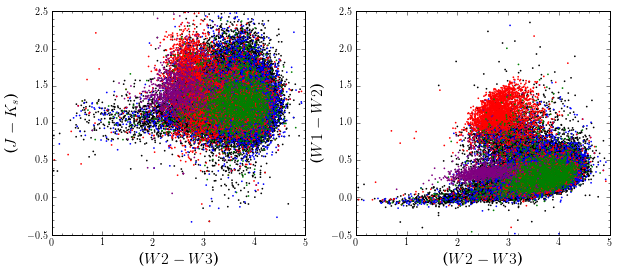

In [15]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.scatter(sf.col23, sf.coljk, s=3, edgecolor="None", c='k')
ax1.scatter(sb.col23, sb.coljk, s=3, edgecolor="None", c='b')
ax1.scatter(qso.col23, qso.coljk, s=3, edgecolor="None", c='r')
ax1.scatter(agn.col23, agn.coljk, s=3, edgecolor="None", c='g')
ax1.scatter(lrgs.col23, lrgs.coljk, s=3, edgecolor="None", c="purple")

ax2 = fig.add_subplot(122)
ax2.scatter(sf.col23, sf.col12, s=3, edgecolor="None", c='k')
ax2.scatter(sb.col23, sb.col12, s=3, edgecolor="None", c='b')
ax2.scatter(qso.col23, qso.col12, s=3, edgecolor="None", c='r')
ax2.scatter(agn.col23, agn.col12, s=3, edgecolor="None", c='g')
ax2.scatter(lrgs.col23, lrgs.col12, s=3, edgecolor="None", c="purple")

#====== Labels and such

ax1.set_xlim(0,5)
ax1.set_xlabel("($W2-W3$)", fontsize=16)
ax1.set_ylim(-0.5,2.5)
ax1.set_ylabel("($J-K_s$)", fontsize=16)
ax1.minorticks_on()

ax2.set_xlim(0,5)
ax2.set_xlabel("($W2-W3$)", fontsize=16)
ax2.set_ylim(-0.5,2.5)
ax2.set_ylabel("($W1-W2$)", fontsize=16)
ax2.minorticks_on()

plt.savefig("../figures/contaminant_color_color_distr.pdf")
plt.show()

In [16]:
print len(sf)
print len(sb)
print len(qso)
print len(agn)
print len(lrgs)

32805
9219
5029
2741
1038


In [17]:
def scaled_color_color(df, xcolor, ycolor, xlim=(0,5), ylim=(0,5), xlabel=None, ylabel=None, outfile=None, cmap=plt.cm.gnuplot2, figsize=(6,6), binsize=0.2, sqdeg=10417., text=None):
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(wspace=0.25, hspace=0.35, left=0.09, right=0.85, top=0.97, bottom=0.1)
    
    dx = dy = binsize
    xbins = np.arange(xlim[0], xlim[1]+dx, dx)
    ybins = np.arange(ylim[0], ylim[1]+dy, dy)
    H, xedges, yedges = np.histogram2d(df[xcolor], df[ycolor], bins=(xbins, ybins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    H = H / sqdeg * 532 # to scale it to LMC
    
    ax = plt.subplot(111)
    imap = ax.imshow(H.T, extent=extent, cmap=cmap, interpolation="nearest", origin="lower")
    if text:
        ax.text(0.9, 0.9, text, transform=ax.transAxes, horizontalalignment="right")
    
    ax.minorticks_on()
    ax.set_xlim(xlim)
    if xlabel:
        ax.set_xlabel(xlabel)
    ax.set_ylim(ylim)
    if ylabel:
        ax.set_ylabel(ylabel)
    if outfile:
        plt.savefig(outfile)

    cax = fig.add_axes([0.86, 0.15, 0.04, 0.77]) 
    cbar = plt.colorbar(imap, cax = cax)
    cbar.ax.set_ylabel("Estimated N by LMC", fontsize=12)

    plt.show()

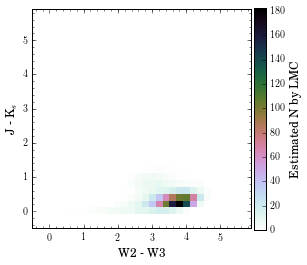

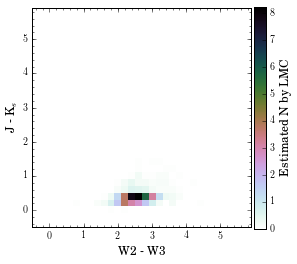

In [18]:
scaled_color_color(sf, "col23", "col12", cmap=plt.cm.cubehelix_r, xlim=(-0.5, 5.9), ylim=(-0.5, 5.9), xlabel="W2 - W3", ylabel="J - K$_s$", figsize=(4,4))
scaled_color_color(lrgs, "col23", "col12", cmap=plt.cm.cubehelix_r, xlim=(-0.5, 5.9), ylim=(-0.5, 5.9), xlabel="W2 - W3", ylabel="J - K$_s$", figsize=(4,4))

In [19]:
fin = "../contaminants/ysos_vizier.tsv"
f = open(fin).readlines()
keep_lines = [line for line in f if (line.startswith("#") == False) & (line.startswith("\n") == False) ]
columns = keep_lines[0][:-1].split("|")
data = {}
for ii in range(len(columns)):
    data[columns[ii]] = []

for ii in range(3, len(keep_lines)):
    the_line = keep_lines[ii][:-1].split("|")
    for jj in range(len(columns)):
        value = the_line[jj]
        try:
            value = float(value)
            data[columns[jj]].append(value)
        except ValueError:
            value = value
            data[columns[jj]].append(value)

ysos = pd.DataFrame(data)
columns = {"W1mag":"w1", "W2mag":"w2", "W3mag":"w3", "W4mag":"w4", "WISE":"wisename", "_DE":"decl", "_RA":"ra", "e_W1mag":"w1err", "e_W2mag":"w2err", "e_W3mag":"w3err", "e_W4mag":"w4err"}
ysos.rename(columns=columns, inplace=True)
ysos["col12"] = ysos.w1 - ysos.w2
ysos["col23"] = ysos.w2 - ysos.w3
ysos["col34"] = ysos.w3 - ysos.w4
ysos["col13"] = ysos.w1 - ysos.w3

cleanysos = ysos.St != "R"
ysos = ysos[cleanysos]

In [20]:
ysos.columns

Index([u'St', u'w1', u'w2', u'w3', u'w4', u'wisename', u'decl', u'ra',
       u'w1err', u'w2err', u'w3err', u'w4err', u'col12', u'col23', u'col34',
       u'col13'],
      dtype='object')

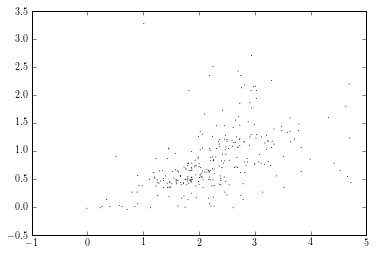

In [21]:
plt.scatter(ysos.col23, ysos.col12, s=1, edgecolor="None", c='k')
plt.show()

In [33]:
# ysos = Data(ysos)
# ysos.to_irsa("ra","decl","../contaminants/ysos_toirsa.dat")

In [22]:
readin = open("../contaminants/ysos_fromirsa.tbl", "r").readlines()
data = readin[25:]
columns = readin[21].split("|")
colnames = []

data_dict = {}

for ii in range(1,len(columns)-1):
    the_name = columns[ii].strip()
    colnames.append(the_name)
    data_dict[the_name] = []

for ii in range(len(data)):
    line = data[ii].split()
    for jj in range(len(colnames)):
        data_dict[colnames[jj]].append(line[jj])

df = pd.DataFrame(data_dict)
df = df.replace("null", np.nan)

rename_these = {
    "designation":"wisename", "cc_flags":"ccflag", "dec":"decl",
    "ext_flg":"extflg",
    "w1mpro":"w1", "w2mpro":"w2", "w3mpro":"w3", "w4mpro":"w4",
    "w1sigmpro":"w1err", "w2sigmpro":"w2err", "w3sigmpro":"w3err", "w4sigmpro":"w4err",
    "j_m_2mass":"jmag", "h_m_2mass":"hmag", "k_m_2mass":"kmag",
    "j_msig_2mass":"jerr", "h_msig_2mass":"herr", "k_msig_2mass":"kerr",
    "n_2mass":"n2mass", "r_2mass":"r2mass", "var_flg":"varflg"
    }
df.rename(columns=rename_these, inplace=True)

retype_these = "decl,ra,w1,w2,w3,w4,w1err,w2err,w3err,w4err,w1snr,w2snr,w3snr,w4snr,jmag,hmag,kmag,jerr,herr,kerr,n2mass,r2mass,extflg,glon,glat"
retype_these = retype_these.split(",")
df[retype_these] = df[retype_these].astype(float)
df.drop(["cntr_01", "dist_x", "pang_x", "ra_01", "dec_01", "id_01"], axis=1, inplace=True)
ysos = df
# ysos["coljk"] = ysos.jmag - ysos.kmag
ysos["col12"] = ysos.w1 - ysos.w2
ysos["col23"] = ysos.w2 - ysos.w3
ysos["col34"] = ysos.w3 - ysos.w4
ysos["col13"] = ysos.w1 - ysos.w3
ysos["coljh"] = ysos.jmag - ysos.hmag
ysos["coljk"] = ysos.jmag - ysos.kmag
ysos["colj1"] = ysos.jmag - ysos.w1
ysos["colj2"] = ysos.jmag - ysos.w2
ysos["colj3"] = ysos.jmag - ysos.w3
ysos["colhk"] = ysos.hmag - ysos.kmag
ysos["colh1"] = ysos.hmag - ysos.w1
ysos["colh2"] = ysos.hmag - ysos.w2
ysos["colh3"] = ysos.hmag - ysos.w3
ysos["colk1"] = ysos.kmag - ysos.w1
ysos["colk2"] = ysos.kmag - ysos.w2
ysos["colk3"] = ysos.kmag - ysos.w3


In [23]:
# ysos.to_csv("../contaminants/ysos_taurus_allmags.dat")
ysos.varflg = ysos.varflg.astype(str).replace("nan", "nnnn")
ysos.ccflag = ysos.ccflag.astype(str).replace("nan", "HHHH")

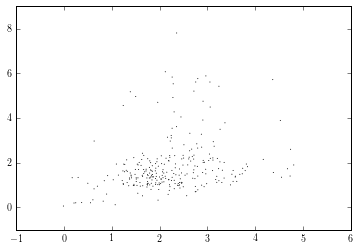

In [24]:
plt.scatter(ysos.col23, ysos.coljk, s=1, edgecolor="None", c='k')
plt.show()

In [25]:
print "======== Original Set ========"
print "Starting: 290"
print "Matched to WISE-2MASS: {0}".format(sum(ysos.n2mass == 1))

print "\n======== Photometry Cuts ========"
print "+ Saturation: {0}".format(sum((ysos.n2mass == 1) & (ysos.w1 > 2.) & (ysos.w2 > 1.5) & (ysos.w3 > -3)))
print "+ Saturation w/ K: {0}".format(sum((ysos.n2mass == 1) & (ysos.w1 > 2.) & (ysos.w2 > 1.5) & (ysos.w3 > -3) & (ysos.kmag > 8.5)))
print "+ Faint W1: {0}".format(sum((ysos.n2mass == 1) & (ysos.w1 > 2.) & (ysos.w2 > 1.5) & (ysos.w3 > -3) & (ysos.kmag > 8.5) & (ysos.w1 < 16.83)))
print "+ Faint W2: {0}".format(sum((ysos.n2mass == 1) & (ysos.w1 > 2.) & (ysos.w2 > 1.5) & (ysos.w3 > -3) & (ysos.kmag > 8.5) & (ysos.w1 < 16.83) & (ysos.w2 < 15.6)))
print "+ Faint W3: {0}".format(sum((ysos.n2mass == 1) & (ysos.w1 > 2.) & (ysos.w2 > 1.5) & (ysos.w3 > -3) & (ysos.kmag > 8.5) & (ysos.w1 < 16.83) & (ysos.w2 < 15.6) & (ysos.w3 < 11.32)))
print "+ Faint K: {0}".format(sum((ysos.n2mass == 1) & (ysos.w1 > 2.) & (ysos.w2 > 1.5) & (ysos.w3 > -3) & (ysos.kmag > 8.5) & (ysos.w1 < 16.83) & (ysos.w2 < 15.6) & (ysos.w3 < 11.32) & (ysos.kmag < 15.5)))
print "+ SNR > 3: {0}".format(sum((ysos.n2mass == 1) & (ysos.w1 > 2.) & (ysos.w2 > 1.5) & (ysos.w3 > -3) & (ysos.kmag > 8.5) & (ysos.w1 < 16.83) & (ysos.w2 < 15.6) & (ysos.w3 < 11.32) & (ysos.kmag < 15.5) & (ysos.w1snr > 3) & (ysos.w2snr > 3) & (ysos.w3snr > 3)))
print "+ [W1/2] CCFlag: {0}".format(sum((ysos.n2mass == 1) & (ysos.w1 > 2.) & (ysos.w2 > 1.5) & (ysos.w3 > -3) & (ysos.kmag > 8.5) & (ysos.w1 < 16.83) & (ysos.w2 < 15.6) & (ysos.w3 < 11.32) & (ysos.kmag < 15.5) & (ysos.w1snr > 3) & (ysos.w2snr > 3) & (ysos.w3snr > 3) & (ysos.ccflag.map(lambda flag: flag.startswith("00")))))
ysoscut = (ysos.n2mass == 1) & (ysos.w1 > 2.) & (ysos.w2 > 1.5) & (ysos.w3 > -3) & (ysos.kmag > 8.5) & (ysos.w1 < 16.83) & (ysos.w2 < 15.6) & (ysos.w3 < 11.32) & (ysos.kmag < 15.5) & (ysos.w1snr > 3) & (ysos.w2snr > 3) & (ysos.w3snr > 3) & (ysos.ccflag.map(lambda flag: flag.startswith("00")))
# ysoscut = ysoscut.ccflag.str.extract("([000.])").replace("0", True).fillna(False)
# print "+ CC [W1/W2/W3] > 3: {0}".format(len(ysoscut))


======== Original Set ========
Starting: 290
Matched to WISE-2MASS: 274

======== Photometry Cuts ========
+ Saturation: 272
+ Saturation w/ K: 214
+ Faint W1: 214
+ Faint W2: 214
+ Faint W3: 214
+ Faint K: 213
+ SNR > 3: 213
+ [W1/2] CCFlag: 181


## Get the locus

In [26]:
locus = pd.read_csv("../contaminants/allwise_lmc_locus.dat", sep=",")
locus["col12"] = locus.w1 - locus.w2
locus["col23"] = locus.w2 - locus.w3
locus["col34"] = locus.w3 - locus.w4
locus["col13"] = locus.w1 - locus.w3
locus["coljh"] = locus.jmag - locus.hmag
locus["coljk"] = locus.jmag - locus.kmag
locus["colj1"] = locus.jmag - locus.w1
locus["colj2"] = locus.jmag - locus.w2
locus["colj3"] = locus.jmag - locus.w3
locus["colhk"] = locus.hmag - locus.kmag
locus["colh1"] = locus.hmag - locus.w1
locus["colh2"] = locus.hmag - locus.w2
locus["colh3"] = locus.hmag - locus.w3
locus["colk1"] = locus.kmag - locus.w1
locus["colk2"] = locus.kmag - locus.w2
locus["colk3"] = locus.kmag - locus.w3

In [27]:
print "======== Original Set ========"
print "Starting: 25,254"
print "Matched to WISE-2MASS: {0}".format(sum(locus.n2mass == 1))

print "\n======== Photometry Cuts ========"
print "+ Saturation: {0}".format(sum((locus.n2mass == 1) & (locus.w1 > 2.) & (locus.w2 > 1.5) & (locus.w3 > -3)))
print "+ Saturation w/ K: {0}".format(sum((locus.n2mass == 1) & (locus.w1 > 2.) & (locus.w2 > 1.5) & (locus.w3 > -3) & (locus.kmag > 8.5)))
print "+ Faint W1: {0}".format(sum((locus.n2mass == 1) & (locus.w1 > 2.) & (locus.w2 > 1.5) & (locus.w3 > -3) & (locus.kmag > 8.5) & (locus.w1 < 16.83)))
print "+ Faint W2: {0}".format(sum((locus.n2mass == 1) & (locus.w1 > 2.) & (locus.w2 > 1.5) & (locus.w3 > -3) & (locus.kmag > 8.5) & (locus.w1 < 16.83) & (locus.w2 < 15.6)))
print "+ Faint W3: {0}".format(sum((locus.n2mass == 1) & (locus.w1 > 2.) & (locus.w2 > 1.5) & (locus.w3 > -3) & (locus.kmag > 8.5) & (locus.w1 < 16.83) & (locus.w2 < 15.6) & (locus.w3 < 11.32)))
print "+ Faint K: {0}".format(sum((locus.n2mass == 1) & (locus.w1 > 2.) & (locus.w2 > 1.5) & (locus.w3 > -3) & (locus.kmag > 8.5) & (locus.w1 < 16.83) & (locus.w2 < 15.6) & (locus.w3 < 11.32) & (locus.kmag < 15.5)))
print "+ SNR > 3: {0}".format(sum((locus.n2mass == 1) & (locus.w1 > 2.) & (locus.w2 > 1.5) & (locus.w3 > -3) & (locus.kmag > 8.5) & (locus.w1 < 16.83) & (locus.w2 < 15.6) & (locus.w3 < 11.32) & (locus.kmag < 15.5) & (locus.w1snr > 3) & (locus.w2snr > 3) & (locus.w3snr > 3)))
print "+ [W1/2] CCFlag: {0}".format(sum((locus.n2mass == 1) & (locus.w1 > 2.) & (locus.w2 > 1.5) & (locus.w3 > -3) & (locus.kmag > 8.5) & (locus.w1 < 16.83) & (locus.w2 < 15.6) & (locus.w3 < 11.32) & (locus.kmag < 15.5) & (locus.w1snr > 3) & (locus.w2snr > 3) & (locus.w3snr > 3) & (locus.ccflag.map(lambda flag: flag.startswith("00")))))

locuscut = (locus.n2mass == 1) & (locus.w1 > 2.) & (locus.w2 > 1.5) & (locus.w3 > -3) & (locus.kmag > 8.5) & (locus.w1 < 16.83) & (locus.w2 < 15.6) & (locus.w3 < 11.32) & (locus.kmag < 15.5) & (locus.w1snr > 3) & (locus.w2snr > 3) & (locus.w3snr > 3) & (locus.ccflag.map(lambda flag: flag.startswith("00")))
# locuscut = locuscut.ccflag.str.extract("([000.])").replace("0", True).fillna(False)
# print "+ CC [W1/W2/W3] > 3: {0}".format(len(locuscut))


======== Original Set ========
Starting: 25,254
Matched to WISE-2MASS: 25254

======== Photometry Cuts ========
+ Saturation: 25254
+ Saturation w/ K: 25156
+ Faint W1: 25154
+ Faint W2: 24382
+ Faint W3: 3154
+ Faint K: 3070
+ SNR > 3: 3056
+ [W1/2] CCFlag: 3056


In [28]:
# owquality = (ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1snr > 3) & (ogle_wise.w2snr > 3) & (ogle_wise.w3snr > 3)  & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83) & (ogle_wise.w2 < 15.6) & (ogle_wise.w3 < 11.32) & (ogle_wise.wkmag < 15.5)
area_conv = 76.5/10417

/Users/Nick/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


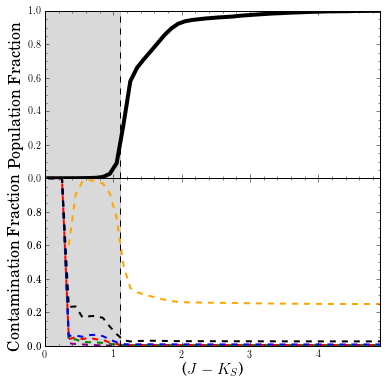

OGLE AGBs retained (%) 90.97

Stellar Locus contamination (%) 4.48
LRG contamination (%) 0.09
QSO contamination (%) 0.34
AGN contamination (%) 0.18
SF Gal contamination (%) 0.34
SB Gal contamination (%) 0.60


In [29]:
owcut = (ogle_wise.I > 12.5) & (ogle_wise.n2mass == 1) & (ogle_wise.w1snr > 3) & (ogle_wise.w2snr > 3) & (ogle_wise.w3snr > 3)  & (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3) & (ogle_wise.wkmag > 8.5) & (ogle_wise.w1 < 16.83) & (ogle_wise.w2 < 15.6) & (ogle_wise.w3 < 11.32) & (ogle_wise.wkmag < 15.5) & (ogle_wise.ccflag.map(lambda flag: flag.startswith("00")))
bins = np.arange(0, 5+0.1, 0.1)
jklim = 1.1

H_loc, edges = np.histogram(locus[locuscut].coljk, bins=bins)
H_ow, edges = np.histogram(ogle_wise[owcut].coljk, bins=bins)
H_lrg, edges = np.histogram(lrgs[lrgscut].coljk, bins=bins)
# H_yso, edges = np.histogram(ysos[ysoscut].coljk, bins=bins)
H1, edges = np.histogram(vagc[vcut1].coljk, bins=bins) # QSO
H2, edges = np.histogram(vagc[vcut2].coljk, bins=bins) # AGN
H3, edges = np.histogram(vagc[vcut3].coljk, bins=bins) # SF
H4, edges = np.histogram(vagc[vcut4].coljk, bins=bins) # SB

dx = (edges[1]-edges[0])/2.

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0)
ax1 = fig.add_subplot(211)
ax1.plot(edges[:-1]+dx, H_ow.cumsum()/float(H_ow.sum()), color="k", linewidth=4)
ax1.plot([jklim, jklim], [0,1.0], color='k', linestyle="--")
ax1.fill_between([bins[0], jklim], [0,0], [1.0,1.0], color='k', alpha=0.15)

ax2 = fig.add_subplot(212)
ax2.plot(edges[:-1]+dx, H_loc.cumsum()/(H_loc.cumsum(dtype=float) + H_ow.cumsum()), color="orange", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H_lrg.cumsum()*area_conv/(H_lrg.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="purple", linewidth=2, linestyle="--")
# ax2.plot(edges[:-1]+dx, H_yso.cumsum()/float(H_yso.sum()), color="r", linestyle=":")
ax2.plot(edges[:-1]+dx, H1.cumsum()*area_conv/(H1.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="r", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H2.cumsum()*area_conv/(H2.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="g", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H4.cumsum()*area_conv/(H4.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="b", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H3.cumsum()*area_conv/(H3.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="k", linewidth=2, linestyle="--")
ax2.plot([jklim, jklim], [0,1.0], color='k', linestyle="--")
ax2.fill_between([bins[0], jklim], [0,0], [1.0,1.0], color='k', alpha=0.15)

# ============ Labels and such

ax1.minorticks_on()
ax1.set_xlim(bins[0], bins[-2])
ax1.set_xticklabels([])
ax1.set_ylabel("Population Fraction", fontsize=16)

ax2.minorticks_on()
ax2.set_xlim(bins[0], bins[-2])
ax2.set_xlabel("($J-K_S$)", fontsize=16)
ax2.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8])
ax2.set_ylabel("Contamination Fraction", fontsize=16)
plt.savefig("../figures/completeness_contamination_jkcut.pdf")
plt.show()

N_ogle = sum(owcut & (ogle_wise.coljk > jklim))
print "OGLE AGBs retained (%%) %.2f\n" % (N_ogle*1.0/sum(owcut) * 100)
print "Stellar Locus contamination (%%) %.2f" % (sum(locuscut & (locus.coljk > jklim)) / (sum(locuscut & (locus.coljk > jklim))*1.0 + N_ogle) * 100)
print "LRG contamination (%%) %.2f" % (sum(lrgscut & (lrgs.coljk > jklim))*area_conv / (sum(lrgscut & (lrgs.coljk > jklim))*area_conv + N_ogle) * 100)
print "QSO contamination (%%) %.2f" % (sum(vcut1 & (vagc.coljk > jklim))*area_conv / (sum(vcut1 & (vagc.coljk > jklim))*area_conv + N_ogle) * 100)
print "AGN contamination (%%) %.2f" % (sum(vcut2 & (vagc.coljk > jklim))*area_conv / (sum(vcut2 & (vagc.coljk > jklim))*area_conv + N_ogle) * 100)
print "SF Gal contamination (%%) %.2f" % (sum(vcut1 & (vagc.coljk > jklim))*area_conv / (sum(vcut1 & (vagc.coljk > jklim))*area_conv + N_ogle) * 100)
print "SB Gal contamination (%%) %.2f" % (sum(vcut4 & (vagc.coljk > jklim))*area_conv / (sum(vcut4 & (vagc.coljk > jklim))*area_conv + N_ogle) * 100)


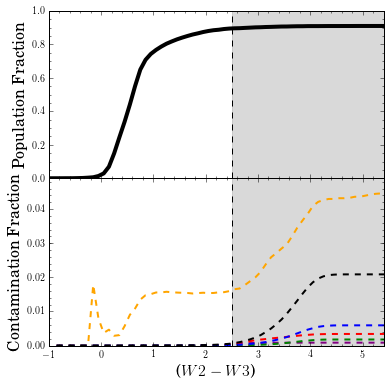


W2-W3 < 2.5
OGLE AGBs retained (%) 89.43

Stellar Locus contamination (%) 1.60
LRG contamination (%) 0.04
QSO contamination (%) 0.03
AGN contamination (%) 0.00
SF Gal contamination (%) 0.03
SB Gal contamination (%) 0.02


In [30]:
bins = np.arange(-1, 5.5+0.1, 0.1)
jklim = 1.1
w23hi = 2.5

H_loc, edges = np.histogram(locus[locuscut & (locus.coljk > jklim)].col23, bins=bins)
H_ow, edges = np.histogram(ogle_wise[owcut & (ogle_wise.coljk > jklim)].col23, bins=bins)
H_lrg, edges = np.histogram(lrgs[lrgscut & (lrgs.coljk > jklim)].col23, bins=bins)
# H_yso, edges = np.histogram(ysos[ysoscut & (ysos.coljk > jklim)].col23, bins=bins)
H1, edges = np.histogram(vagc[vcut1 & (vagc.coljk > jklim)].col23, bins=bins)
H2, edges = np.histogram(vagc[vcut2 & (vagc.coljk > jklim)].col23, bins=bins)
H3, edges = np.histogram(vagc[vcut3 & (vagc.coljk > jklim)].col23, bins=bins)
H4, edges = np.histogram(vagc[vcut4 & (vagc.coljk > jklim)].col23, bins=bins)

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0)
ax1 = fig.add_subplot(211)
ax1.plot(edges[:-1]+dx, H_ow.cumsum()/float(owcut.sum()), color="k", linewidth=4)
ax1.plot([w23hi, w23hi], [0,1.0], color='k', linestyle="--")
ax1.fill_between([w23hi, 10], [0,0], [1.0,1.0], color='k', alpha=0.15)

ax2 = fig.add_subplot(212)
ax2.plot(edges[:-1]+dx, H_loc.cumsum()/(H_loc.cumsum(dtype=float) + H_ow.cumsum()), color="orange", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H_lrg.cumsum()*area_conv/(H_lrg.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="purple", linewidth=2, linestyle="--")
# ax2.plot(edges[:-1]+dx, H_yso.cumsum()/float(H_yso.sum()), color="r", linestyle=":")
ax2.plot(edges[:-1]+dx, H1.cumsum()*area_conv/(H1.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="r", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H2.cumsum()*area_conv/(H2.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="g", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H4.cumsum()*area_conv/(H4.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="b", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H3.cumsum()*area_conv/(H3.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="k", linewidth=2, linestyle="--")
ax2.plot([w23hi, w23hi], [0,1.0], color='k', linestyle="--")
ax2.fill_between([w23hi, 10], [0,0], [1.0,1.0], color='k', alpha=0.15)

# ============ Labels and such

ax1.minorticks_on()
ax1.set_xlim(bins[0], bins[-2])
ax1.set_xticklabels([])
ax1.set_ylabel("Population Fraction", fontsize=16)

ax2.minorticks_on()
ax2.set_xlim(bins[0], bins[-2])
ax2.set_xlabel("($W2-W3$)", fontsize=16)
ax2.set_ylim(0,0.049)
ax2.set_ylabel("Contamination Fraction", fontsize=16)
plt.savefig("../figures/completeness_contamination_w23cut.pdf")
plt.show()

N_ogle = sum(owcut & (ogle_wise.coljk > jklim) & (ogle_wise.col23 < w23hi))
print "\nW2-W3 < {0}".format(w23hi)
print "OGLE AGBs retained (%%) %.2f\n" % (N_ogle*1.0/sum(owcut) * 100)
print "Stellar Locus contamination (%%) %.2f" % (sum(locuscut & (locus.coljk > jklim) & (locus.col23 < w23hi)) / (sum(locuscut & (locus.coljk > jklim) & (locus.col23 < w23hi))*1.0 + N_ogle) * 100)
print "LRG contamination (%%) %.2f" % (sum(lrgscut & (lrgs.coljk > jklim) & (lrgs.col23 < w23hi))*area_conv / (sum(lrgscut & (lrgs.coljk > jklim) & (lrgs.col23 < w23hi)  )*area_conv + N_ogle) * 100)
print "QSO contamination (%%) %.2f" % (sum(vcut1 & (vagc.coljk > jklim) & (vagc.col23 < w23hi))*area_conv / (sum(vcut1 & (vagc.coljk > jklim) & (vagc.col23 < w23hi)  )*area_conv + N_ogle) * 100)
print "AGN contamination (%%) %.2f" % (sum(vcut2 & (vagc.coljk > jklim) & (vagc.col23 < w23hi))*area_conv / (sum(vcut2 & (vagc.coljk > jklim) & (vagc.col23 < w23hi)  )*area_conv + N_ogle) * 100)
print "SF Gal contamination (%%) %.2f" % (sum(vcut1 & (vagc.coljk > jklim) & (vagc.col23 < w23hi))*area_conv / (sum(vcut1 & (vagc.coljk > jklim) & (vagc.col23 < w23hi))*area_conv + N_ogle) * 100)
print "SB Gal contamination (%%) %.2f" % (sum(vcut4 & (vagc.coljk > jklim) & (vagc.col23 < w23hi))*area_conv / (sum(vcut4 & (vagc.coljk > jklim) & (vagc.col23 < w23hi)  )*area_conv + N_ogle) * 100)

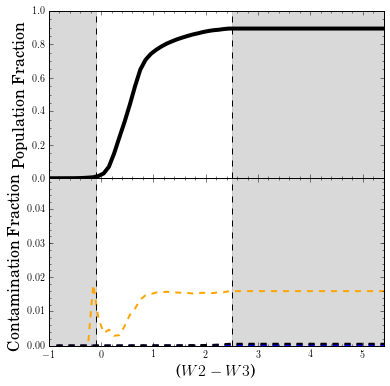


All Cuts
OGLE AGBs retained (%) 88.83

Stellar Locus contamination (%) 1.59
LRG contamination (%) 0.04
QSO contamination (%) 0.03
AGN contamination (%) 0.00
SF Gal contamination (%) 0.03
SB Gal contamination (%) 0.02


In [31]:
bins = np.arange(-1, 5.5+0.1, 0.1)
jklim = 1.1
w23hi = 2.5
w23lo = -0.1

H_loc, edges = np.histogram(locus[locuscut & (locus.coljk > jklim) & (locus.col23 < w23hi)].col23, bins=bins)
H_ow, edges = np.histogram(ogle_wise[owcut & (ogle_wise.coljk > jklim) & (ogle_wise.col23 < w23hi)].col23, bins=bins)
H_lrg, edges = np.histogram(lrgs[lrgscut & (lrgs.coljk > jklim) & (lrgs.col23 < w23hi)].col23, bins=bins)
# H_yso, edges = np.histogram(ysos[ysoscut & (ysos.coljk > 1.1)].col23, bins=bins)
H1, edges = np.histogram(vagc[vcut1 & (vagc.coljk > jklim) & (vagc.col23 < w23hi)].col23, bins=bins)
H2, edges = np.histogram(vagc[vcut2 & (vagc.coljk > jklim) & (vagc.col23 < w23hi)].col23, bins=bins)
H3, edges = np.histogram(vagc[vcut3 & (vagc.coljk > jklim) & (vagc.col23 < w23hi)].col23, bins=bins)
H4, edges = np.histogram(vagc[vcut4 & (vagc.coljk > jklim) & (vagc.col23 < w23hi)].col23, bins=bins)

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0)
ax1 = fig.add_subplot(211)
ax1.plot(edges[:-1]+dx, H_ow.cumsum()/float(owcut.sum()), color="k", linewidth=4)
ax1.plot([w23hi, w23hi], [0,1.0], color='k', linestyle="--")
ax1.plot([w23lo, w23lo], [0,1.0], color='k', linestyle="--")
ax1.fill_between([w23hi, 10], [0,0], [1.0,1.0], color='k', alpha=0.15)
ax1.fill_between([bins[0], w23lo], [0,0], [1.0,1.0], color='k', alpha=0.15)

ax2 = fig.add_subplot(212)
ax2.plot(edges[:-1]+dx, H_loc.cumsum()/(H_loc.cumsum(dtype=float) + H_ow.cumsum()), color="orange", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H_lrg.cumsum()*area_conv/(H_lrg.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="purple", linewidth=2, linestyle="--")
# ax2.plot(edges[:-1]+dx, H_yso.cumsum()/float(H_yso.sum()), color="r", linestyle=":")
ax2.plot(edges[:-1]+dx, H1.cumsum()*area_conv/(H1.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="r", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H2.cumsum()*area_conv/(H2.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="g", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H4.cumsum()*area_conv/(H4.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="b", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H3.cumsum()*area_conv/(H3.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="k", linewidth=2, linestyle="--")
ax2.plot([w23hi, w23hi], [0,1.0], color='k', linestyle="--")
ax2.plot([w23lo, w23lo], [0,1.0], color='k', linestyle="--")
ax2.fill_between([w23hi, 10], [0,0], [1.0,1.0], color='k', alpha=0.15)
ax2.fill_between([bins[0], w23lo], [0,0], [1.0,1.0], color='k', alpha=0.15)

# ============ Labels and such

ax1.minorticks_on()
ax1.set_xlim(bins[0], bins[-2])
ax1.set_xticklabels([])
ax1.set_ylabel("Population Fraction", fontsize=16)

ax2.minorticks_on()
ax2.set_xlim(bins[0], bins[-2])
ax2.set_xlabel("($W2-W3$)", fontsize=16)
ax2.set_ylim(0,0.049)
ax2.set_ylabel("Contamination Fraction", fontsize=16)
plt.savefig("../figures/completeness_contamination_allcuts.pdf")
plt.show()

N_ogle = sum(owcut & (ogle_wise.coljk > jklim) & (ogle_wise.col23 < w23hi) & (ogle_wise.col23 > w23lo))
print "\nAll Cuts"
print "OGLE AGBs retained (%%) %.2f\n" % (N_ogle*1.0/sum(owcut) * 100)
print "Stellar Locus contamination (%%) %.2f" % (sum(locuscut & (locus.coljk > jklim) & (locus.col23 < w23hi) & (locus.col23 > w23lo)) / (sum(locuscut & (locus.coljk > jklim) & (locus.col23 < w23hi) & (locus.col23 > w23lo))*1.0 + N_ogle) * 100)
print "LRG contamination (%%) %.2f" % (sum(lrgscut & (lrgs.coljk > jklim) & (lrgs.col23 < w23hi) & (lrgs.col23 > w23lo))*area_conv / (sum(lrgscut & (lrgs.coljk > jklim) & (lrgs.col23 < w23hi) & (lrgs.col23 > w23lo))*area_conv + N_ogle) * 100)
print "QSO contamination (%%) %.2f" % (sum(vcut1 & (vagc.coljk > jklim) & (vagc.col23 < w23hi) & (vagc.col23 > w23lo))*area_conv / (sum(vcut1 & (vagc.coljk > jklim) & (vagc.col23 < w23hi) & (vagc.col23 > w23lo))*area_conv + N_ogle) * 100)
print "AGN contamination (%%) %.2f" % (sum(vcut2 & (vagc.coljk > jklim) & (vagc.col23 < w23hi) & (vagc.col23 > w23lo))*area_conv / (sum(vcut2 & (vagc.coljk > jklim) & (vagc.col23 < w23hi) & (vagc.col23 > w23lo))*area_conv + N_ogle) * 100)
print "SF Gal contamination (%%) %.2f" % (sum(vcut1 & (vagc.coljk > jklim) & (vagc.col23 < w23hi) & (vagc.col23 > w23lo))*area_conv / (sum(vcut1 & (vagc.coljk > jklim) & (vagc.col23 < w23hi) & (vagc.col23 > w23lo))*area_conv + N_ogle) * 100)
print "SB Gal contamination (%%) %.2f" % (sum(vcut4 & (vagc.coljk > jklim) & (vagc.col23 < w23hi) & (vagc.col23 > w23lo))*area_conv / (sum(vcut4 & (vagc.coljk > jklim) & (vagc.col23 < w23hi) & (vagc.col23 > w23lo))*area_conv + N_ogle) * 100)

-0.1


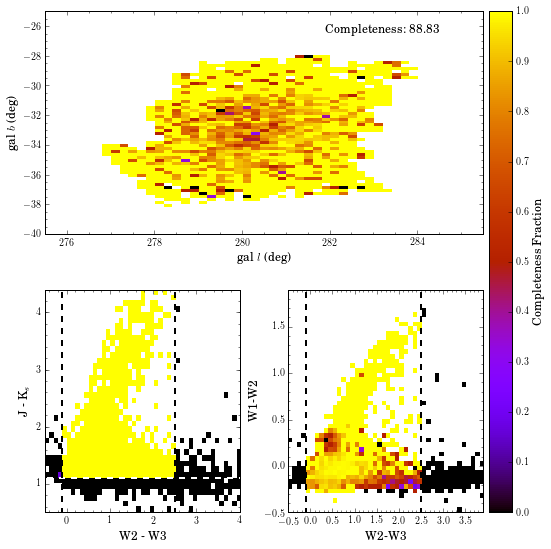

In [32]:
plot_comparison(ogle_wise[owcut & (ogle_wise.coljk > jklim) & (ogle_wise.col23 < w23hi) & (ogle_wise.col23 > w23lo)], ogle_wise[owcut], binsize=0.2, cmap=plt.cm.gnuplot, figsize=(8,8), w23hi=w23hi, w23lo=w23lo, jklim=jklim, vmin=0, outfile="../figures/ogle_completeness_map.png")

In [33]:
def variability(df, varcol="varflg"):
    w1var = np.zeros(len(df))
    w2var = np.zeros(len(df))
    w3var = np.zeros(len(df))
    w4var = np.zeros(len(df))
    
    for ii in range(len(df)):
        var = df[varcol].iloc[ii]
        var1 = var[0]
        var2 = var[1]
        var3 = var[2]
        var4 = var[3]

        if var1 == "n":
            var1 = "-1"
        if var2 == "n":
            var2 = "-1"
        if var3 == "n":
            var3 = "-1"
        if var4 == "n":
            var4 = "-1"

        w1var[ii] = var1
        w2var[ii] = var2
        w3var[ii] = var3
        w4var[ii] = var4

    return w1var, w2var, w3var, w4var

In [34]:
ogle_wise["w1var"], ogle_wise["w2var"], ogle_wise["w3var"], ogle_wise["w4var"] = variability(ogle_wise) 
vagc["w1var"], vagc["w2var"], vagc["w3var"], vagc["w4var"] = variability(vagc, varcol="var_flg") 
lrgs["w1var"], lrgs["w2var"], lrgs["w3var"], lrgs["w4var"] = variability(lrgs, varcol="var_flg") 
locus["w1var"], locus["w2var"], locus["w3var"], locus["w4var"] = variability(locus, varcol="varflg") 
ysos["w1var"], ysos["w2var"], ysos["w3var"], ysos["w4var"] = variability(ysos, varcol="varflg") 


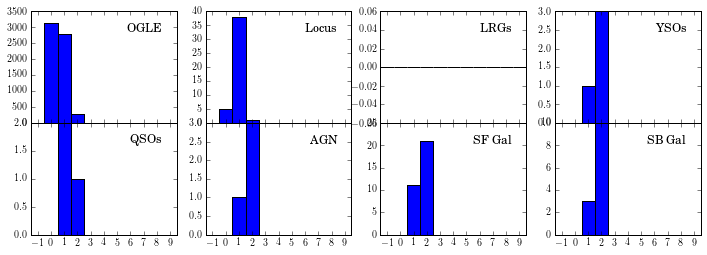

In [35]:
bins = np.arange(-1,11,1)

H_loc, edges = np.histogram(locus[locuscut & (locus.coljk > 1.1) & (locus.col23 < 2.5) & (locus.colj2 < 2.1) & (locus.colh3 < 2.5)].colh3, bins=bins)
H_ow, edges = np.histogram(ogle_wise[owcut & (ogle_wise.coljk > 1.1) & (ogle_wise.col23 < 2.5) & (ogle_wise.colj2 < 2.1) & (ogle_wise.colh3 < 2.5)].colh3, bins=bins)
H_lrg, edges = np.histogram(lrgs[lrgscut & (lrgs.coljk > 1.1) & (lrgs.col23 < 2.5) & (lrgs.colj2 < 2.1) & (lrgs.colh3 < 2.5)].colh3, bins=bins)
H_yso, edges = np.histogram(ysos[ysoscut & (ysos.coljk > 1.1) & (ysos.col23 < 2.5) & (ysos.colj2 < 2.1) & (ysos.colh3 < 2.5)].colh3, bins=bins)
H1, edges = np.histogram(vagc[vcut1 & (vagc.coljk > 1.1) & (vagc.col23 < 2.5) & (vagc.colj2 < 2.1) & (vagc.colh3 < 2.5)].colh3, bins=bins)
H2, edges = np.histogram(vagc[vcut2 & (vagc.coljk > 1.1) & (vagc.col23 < 2.5) & (vagc.colj2 < 2.1) & (vagc.colh3 < 2.5)].colh3, bins=bins)
H3, edges = np.histogram(vagc[vcut3 & (vagc.coljk > 1.1) & (vagc.col23 < 2.5) & (vagc.colj2 < 2.1) & (vagc.colh3 < 2.5)].colh3, bins=bins)
H4, edges = np.histogram(vagc[vcut4 & (vagc.coljk > 1.1) & (vagc.col23 < 2.5) & (vagc.colj2 < 2.1) & (vagc.colh3 < 2.5)].colh3, bins=bins)

dx = (edges[1]-edges[0])/2.

fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(hspace=0)
ax = fig.add_subplot(2,4,1)
ax.bar(edges[:-1]-dx, H_ow, width=1.0)
ax.text(0.9, 0.9, "OGLE", transform = ax.transAxes, horizontalalignment="right", verticalalignment="top")
ax.set_xticks(np.arange(-1,10))
ax.set_xticklabels([])
ax.set_xlim(-1.5,9.5)

ax = fig.add_subplot(2,4,2)
ax.bar(edges[:-1]-dx, H_loc, width=1.0)
ax.text(0.9, 0.9, "Locus", transform = ax.transAxes, horizontalalignment="right", verticalalignment="top")
ax.set_xticks(np.arange(-1,10))
ax.set_xticklabels([])
ax.set_xlim(-1.5,9.5)

ax = fig.add_subplot(2,4,3)
ax.bar(edges[:-1]-dx, H_lrg, width=1.0)
ax.text(0.9, 0.9, "LRGs", transform = ax.transAxes, horizontalalignment="right", verticalalignment="top")
ax.set_xticks(np.arange(-1,10))
ax.set_xticklabels([])
ax.set_xlim(-1.5,9.5)

ax = fig.add_subplot(2,4,4)
ax.bar(edges[:-1]-dx, H_yso, width=1.0)
ax.text(0.9, 0.9, "YSOs", transform = ax.transAxes, horizontalalignment="right", verticalalignment="top")
ax.set_xticks(np.arange(-1,10))
ax.set_xticklabels([])
ax.set_xlim(-1.5,9.5)

ax = fig.add_subplot(2,4,5)
ax.bar(edges[:-1]-dx, H1, width=1.0)
ax.text(0.9, 0.9, "QSOs", transform = ax.transAxes, horizontalalignment="right", verticalalignment="top")
ax.set_xlim(-1.5,9.5)
ax.set_xticks(np.arange(-1,10))

ax = fig.add_subplot(2,4,6)
ax.bar(edges[:-1]-dx, H2, width=1.0)
ax.text(0.9, 0.9, "AGN", transform = ax.transAxes, horizontalalignment="right", verticalalignment="top")
ax.set_xlim(-1.5,9.5)
ax.set_xticks(np.arange(-1,10))

ax = fig.add_subplot(2,4,7)
ax.text(0.9, 0.9, "SF Gal", transform = ax.transAxes, horizontalalignment="right", verticalalignment="top")
ax.bar(edges[:-1]-dx, H3, width=1.0)
ax.set_xlim(-1.5,9.5)
ax.set_xticks(np.arange(-1,10))

ax = fig.add_subplot(2,4,8)
ax.text(0.9, 0.9, "SB Gal", transform = ax.transAxes, horizontalalignment="right", verticalalignment="top")
ax.bar(edges[:-1]-dx, H4, width=1.0)
ax.set_xlim(-1.5,9.5)
ax.set_xticks(np.arange(-1,10))
plt.show()

63308

In [128]:
w23lo, w23hi, jklim

(0, 2.5, 1.1)